In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats
import os

In [2]:
path = '/home/investigator/mariandbt/python/data/'
# path = path + '20230124/'
path = path + '20230119/'

filename = os.path.join(path, 'Acq_LED1.04V_PMT5.5V_gan0.8.txt')
# filename = os.path.join(path, 'pmt_without_fibers_dig2-192.168.0.254-05.txt')

with open(filename) as f:
    data = np.loadtxt(f)

In [3]:
np.shape(data)

(6565000, 3)

note: the way the data is stored when using only ONE FILE is the following:
- column 0 is just an index (x-axis if you  will), while columns 1, 2, 3 correspond to data from different channels
- each column stores data from MULTIPLE FRAMES
- each frame has 1000 points, so in column 0 you can see how after 999 it resets to 0 when the frame changes

### Baseline substraction

#### Baseline mean determination for 1 frame

-0.6593667896625607


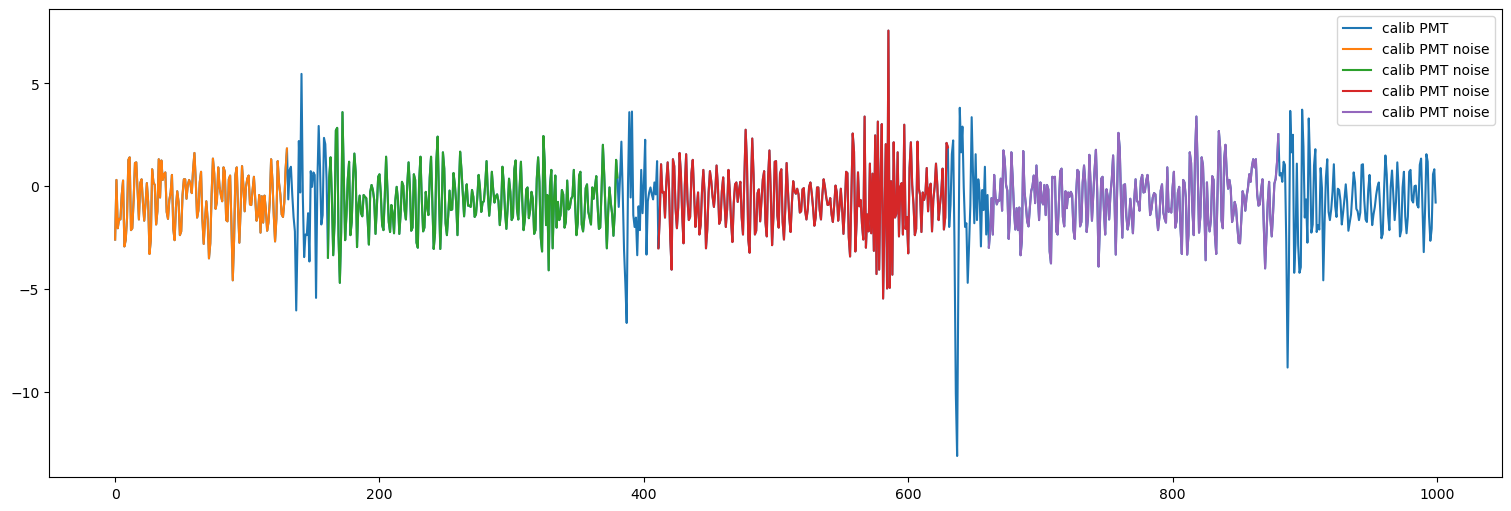

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

frame = 563
base_line = 0
peak_range = 6
peak_reg = 250

data_slice = data[1000*frame:1000*(frame + 1), 2]
x_ax = data[1000*frame:1000*(frame + 1), 0]
# ax.plot(x_ax, -6*np.ones(len(x_ax)))

ax.plot(x_ax, data_slice - base_line, label = 'calib PMT')
# i = 3
# ax.plot(x_ax[peak_reg*i:peak_reg*(i+1)], data_slice[peak_reg*i:peak_reg*(i+1)] + base_line, label = 'calib PMT')

base = []

# we append the first baseline region separately because it is not in between peaks
offset_next = int(np.where(data_slice[0:peak_reg] == data_slice[0:peak_reg].min())[0][0])
data_region = data_slice[0 : offset_next - peak_range]
x_ax_reg = x_ax[0 : offset_next - peak_range]

base.append(data_region.mean())
ax.plot(x_ax_reg, data_region, label = 'calib PMT noise')


for i in range(3):
    offset = peak_reg*i + int(np.where(data_slice[peak_reg*i:peak_reg*(i+1)] == data_slice[peak_reg*i:peak_reg*(i+1)].min())[0][0])
    offset_next = peak_reg*(i+1) + int(np.where(data_slice[peak_reg*(i+1):peak_reg*(2+i)] == data_slice[peak_reg*(i+1):peak_reg*(2+i)].min())[0][0])
    
    data_region = data_slice[offset + peak_range*4 : offset_next - peak_range]
    x_ax_reg = x_ax[offset + peak_range*4 : offset_next - peak_range]
    
    base.append(data_region.mean())
    ax.plot(x_ax_reg, data_region, label = 'calib PMT noise')


base_line = np.array(base).mean()
print(base_line)

# ax.plot(x_ax, data_slice - base_line, label = 'calib PMT corrected by baseline')
ax.legend(loc = 'best')


## Peaks integral with baseline substracted

### 1 frame

244
244 387 -0.49071976017699115
387 636 -0.6272225328767124
636 887 -0.552915143438914
[-0.5306036180672269, -0.49071976017699115, -0.6272225328767124, -0.552915143438914] -0.5503652636399611


-7.628238749960427

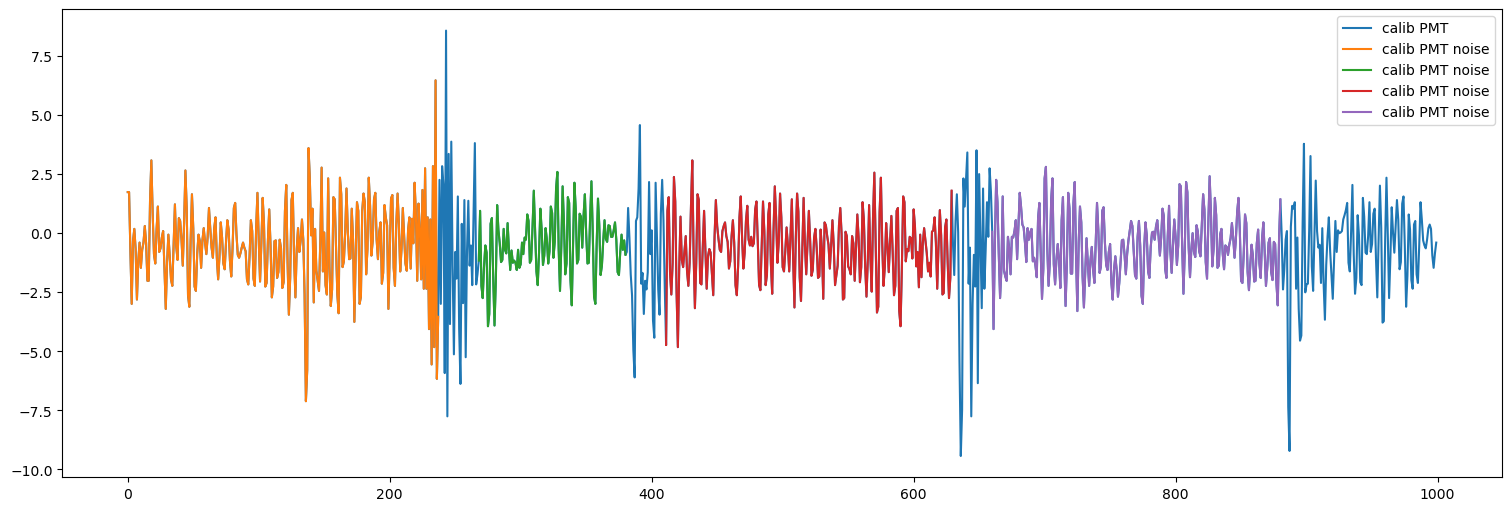

In [14]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5), constrained_layout=True)

frame = 246
base_line = 0
peak_range = 6
peak_reg = 260

peak_integr = []
peak_integr_pos = []
base = []

#______inicio de bucle on frames HERE_______

data_slice = data[1000*frame:1000*(frame + 1), 2]
# data_slice = data[1000*frame:1000*(frame + 1), 3]
x_ax = data[1000*frame:1000*(frame + 1), 0]

ax.plot(x_ax, data_slice - base_line, label = 'calib PMT')

# we append the first baseline region separately because it is not in between peaks
offset_next = int(np.where(data_slice[0:peak_reg] == data_slice[0:peak_reg].min())[0][0])
data_region = data_slice[0 : offset_next - peak_range]
x_ax_reg = x_ax[0 : offset_next - peak_range]

base.append(data_region.mean())
ax.plot(x_ax_reg, data_region, label = 'calib PMT noise')
print(offset_next)


#________________________________________________BASELINE_______________________________________________________

for i in range(3):
    offset = peak_reg*i + int(np.where(data_slice[peak_reg*i:peak_reg*(i+1)] == data_slice[peak_reg*i:peak_reg*(i+1)].min())[0][0])
    offset_next = peak_reg*(i+1) + int(np.where(data_slice[peak_reg*(i+1):peak_reg*(2+i)] == data_slice[peak_reg*(i+1):peak_reg*(2+i)].min())[0][0])
    
    data_region = data_slice[offset + peak_range*4 : offset_next - peak_range]
    x_ax_reg = x_ax[offset + peak_range*4 : offset_next - peak_range]
    
    base.append(data_region.mean())
    ax.plot(x_ax_reg, data_region, label = 'calib PMT noise')
    print(offset, offset_next, data_region.mean())


base_line = np.array(base).mean()
print(base, base_line)

# ax.plot(x_ax, data_slice - base_line, label = 'calib PMT corrected by baseline')
ax.legend(loc = 'best')

#________________________________________________INTEGRAL_______________________________________________________

for i in range(1, 4):

    offset = peak_reg*i + int(np.where(data_slice[peak_reg*i:peak_reg*(i+1)] == data_slice[peak_reg*i:peak_reg*(i+1)].min())[0][0])
    data_region = data_slice[offset - peak_range : offset + peak_range]
    x_ax_reg = x_ax[offset - peak_range : offset + peak_range]
#     x_ax = range(len(data_region))

    integr = np.trapz(data_region - base_line, x=x_ax_reg)
#     integr = np.trapz(data_region, x=x_ax_reg)

    peak_integr.append(integr)
    peak_integr_pos.append([integr, frame, i])
#     ax.plot(x_ax_reg, data_region - base_line, label = 'calib PMT signal')

peak_integr = np.array(peak_integr)
peak_integr_pos = np.array(peak_integr_pos)

# ax.plot(data_region)
# ax.legend(loc = 'best')

peak_integr.mean()
# peak_integr
# peak_integr_pos

### ALL frames

In [13]:
peak_range = 6
peak_reg = 260
# peak_reg = 250

peak_integr = []
peak_integr_pos = []
base = []

#______inicio de bucle on frames HERE_______

frame_max = int(np.shape(data)[0]/1000)

for frame in range(frame_max):

    data_slice = data[1000*frame:1000*(frame + 1), 2]
#     data_slice = data[1000*frame:1000*(frame + 1), 3]
    x_ax = data[1000*frame:1000*(frame + 1), 0]


    # we append the first baseline region separately because it is not in between peaks
    offset_next = int(np.where(data_slice[0:peak_reg] == data_slice[0:peak_reg].min())[0][0])
    data_region = data_slice[0 : offset_next - peak_range]
    x_ax_reg = x_ax[0 : offset_next - peak_range]

    base.append(data_region.mean())


    #________________________________________________BASELINE_______________________________________________________

    for i in range(3):
        offset = peak_reg*i + int(np.where(data_slice[peak_reg*i:peak_reg*(i+1)] == data_slice[peak_reg*i:peak_reg*(i+1)].min())[0][0])
        offset_next = peak_reg*(i+1) + int(np.where(data_slice[peak_reg*(i+1):peak_reg*(2+i)] == data_slice[peak_reg*(i+1):peak_reg*(2+i)].min())[0][0])

        data_region = data_slice[offset + peak_range*4 : offset_next - peak_range]
        x_ax_reg = x_ax[offset + peak_range*4 : offset_next - peak_range]

        base.append(data_region.mean())


    base_line = np.array(base).mean()
    print(frame, base_line)


    #________________________________________________INTEGRAL_______________________________________________________

    for i in range(1, 4):

        offset = peak_reg*i + int(np.where(data_slice[peak_reg*i:peak_reg*(i+1)] == data_slice[peak_reg*i:peak_reg*(i+1)].min())[0][0])
        data_region = data_slice[offset - peak_range : offset + peak_range]
        x_ax_reg = x_ax[offset - peak_range : offset + peak_range]
    #     x_ax = range(len(data_region))

        integr = np.trapz(data_region - base_line, x=x_ax_reg)
    #     integr = np.trapz(data_region, x=x_ax_reg)

        peak_integr.append(integr)
        peak_integr_pos.append([integr, frame, i])

peak_integr = np.array(peak_integr)
peak_integr_pos = np.array(peak_integr_pos)

# peak_integr.mean()
# peak_integr
# peak_integr_pos

0 -0.6289544398251747
1 -0.6440041474171869
2 -0.6457221942752175
3 -0.645519745350881
4 -0.6323458468157499
5 -0.6356403729332349
6 -0.6359681038000148
7 -0.6362527773636888
8 -0.6373194119329636
9 -0.636660871495786
10 -0.6342789412525263
11 -0.635971584719682
12 -0.6389945751655322
13 -0.642803523799616
14 -0.6420959311803409
15 -0.6432759094152531
16 -0.6453969355442137
17 -0.6471937761185457
18 -0.6512740183432851
19 -0.6523863904068634
20 -0.655311634872387
21 -0.6578689812305076
22 -0.6567604629811212
23 -0.6561963323397167
24 -0.6571021813817924
25 -0.6560885092250947
26 -0.6569752185253566
27 -0.6577338400991921
28 -0.6573256512327353
29 -0.6590488218692696
30 -0.6579602484623922
31 -0.6581156653088489
32 -0.6583914831111158
33 -0.6582515869926244
34 -0.6578171239963646
35 -0.6573846148190694
36 -0.6575256088198237
37 -0.6574278989458214
38 -0.6568342549563325
39 -0.6569159923015229
40 -0.6563019912255607
41 -0.6571394535006665
42 -0.6577675395216783
43 -0.6583830019836868
44 

/tmp/ipykernel_13795/2713598490.py:37: RuntimeWarning: Mean of empty slice.
  base.append(data_region.mean())


1547 nan
1548 nan
1549 nan
1550 nan
1551 nan
1552 nan
1553 nan
1554 nan
1555 nan
1556 nan
1557 nan
1558 nan
1559 nan
1560 nan
1561 nan
1562 nan
1563 nan
1564 nan
1565 nan
1566 nan
1567 nan
1568 nan
1569 nan
1570 nan
1571 nan
1572 nan
1573 nan
1574 nan
1575 nan
1576 nan
1577 nan
1578 nan
1579 nan
1580 nan
1581 nan
1582 nan
1583 nan
1584 nan
1585 nan
1586 nan
1587 nan
1588 nan
1589 nan
1590 nan
1591 nan
1592 nan
1593 nan
1594 nan
1595 nan
1596 nan
1597 nan
1598 nan
1599 nan
1600 nan
1601 nan
1602 nan
1603 nan
1604 nan
1605 nan
1606 nan
1607 nan
1608 nan
1609 nan
1610 nan
1611 nan
1612 nan
1613 nan
1614 nan
1615 nan
1616 nan
1617 nan
1618 nan
1619 nan
1620 nan
1621 nan
1622 nan
1623 nan
1624 nan
1625 nan
1626 nan
1627 nan
1628 nan
1629 nan
1630 nan
1631 nan
1632 nan
1633 nan
1634 nan
1635 nan
1636 nan
1637 nan
1638 nan
1639 nan
1640 nan
1641 nan
1642 nan
1643 nan
1644 nan
1645 nan
1646 nan
1647 nan
1648 nan
1649 nan
1650 nan
1651 nan
1652 nan
1653 nan
1654 nan
1655 nan
1656 nan
1657 nan
1

2973 nan
2974 nan
2975 nan
2976 nan
2977 nan
2978 nan
2979 nan
2980 nan
2981 nan
2982 nan
2983 nan
2984 nan
2985 nan
2986 nan
2987 nan
2988 nan
2989 nan
2990 nan
2991 nan
2992 nan
2993 nan
2994 nan
2995 nan
2996 nan
2997 nan
2998 nan
2999 nan
3000 nan
3001 nan
3002 nan
3003 nan
3004 nan
3005 nan
3006 nan
3007 nan
3008 nan
3009 nan
3010 nan
3011 nan
3012 nan
3013 nan
3014 nan
3015 nan
3016 nan
3017 nan
3018 nan
3019 nan
3020 nan
3021 nan
3022 nan
3023 nan
3024 nan
3025 nan
3026 nan
3027 nan
3028 nan
3029 nan
3030 nan
3031 nan
3032 nan
3033 nan
3034 nan
3035 nan
3036 nan
3037 nan
3038 nan
3039 nan
3040 nan
3041 nan
3042 nan
3043 nan
3044 nan
3045 nan
3046 nan
3047 nan
3048 nan
3049 nan
3050 nan
3051 nan
3052 nan
3053 nan
3054 nan
3055 nan
3056 nan
3057 nan
3058 nan
3059 nan
3060 nan
3061 nan
3062 nan
3063 nan
3064 nan
3065 nan
3066 nan
3067 nan
3068 nan
3069 nan
3070 nan
3071 nan
3072 nan
3073 nan
3074 nan
3075 nan
3076 nan
3077 nan
3078 nan
3079 nan
3080 nan
3081 nan
3082 nan
3083 nan
3

4089 nan
4090 nan
4091 nan
4092 nan
4093 nan
4094 nan
4095 nan
4096 nan
4097 nan
4098 nan
4099 nan
4100 nan
4101 nan
4102 nan
4103 nan
4104 nan
4105 nan
4106 nan
4107 nan
4108 nan
4109 nan
4110 nan
4111 nan
4112 nan
4113 nan
4114 nan
4115 nan
4116 nan
4117 nan
4118 nan
4119 nan
4120 nan
4121 nan
4122 nan
4123 nan
4124 nan
4125 nan
4126 nan
4127 nan
4128 nan
4129 nan
4130 nan
4131 nan
4132 nan
4133 nan
4134 nan
4135 nan
4136 nan
4137 nan
4138 nan
4139 nan
4140 nan
4141 nan
4142 nan
4143 nan
4144 nan
4145 nan
4146 nan
4147 nan
4148 nan
4149 nan
4150 nan
4151 nan
4152 nan
4153 nan
4154 nan
4155 nan
4156 nan
4157 nan
4158 nan
4159 nan
4160 nan
4161 nan
4162 nan
4163 nan
4164 nan
4165 nan
4166 nan
4167 nan
4168 nan
4169 nan
4170 nan
4171 nan
4172 nan
4173 nan
4174 nan
4175 nan
4176 nan
4177 nan
4178 nan
4179 nan
4180 nan
4181 nan
4182 nan
4183 nan
4184 nan
4185 nan
4186 nan
4187 nan
4188 nan
4189 nan
4190 nan
4191 nan
4192 nan
4193 nan
4194 nan
4195 nan
4196 nan
4197 nan
4198 nan
4199 nan
4

5054 nan
5055 nan
5056 nan
5057 nan
5058 nan
5059 nan
5060 nan
5061 nan
5062 nan
5063 nan
5064 nan
5065 nan
5066 nan
5067 nan
5068 nan
5069 nan
5070 nan
5071 nan
5072 nan
5073 nan
5074 nan
5075 nan
5076 nan
5077 nan
5078 nan
5079 nan
5080 nan
5081 nan
5082 nan
5083 nan
5084 nan
5085 nan
5086 nan
5087 nan
5088 nan
5089 nan
5090 nan
5091 nan
5092 nan
5093 nan
5094 nan
5095 nan
5096 nan
5097 nan
5098 nan
5099 nan
5100 nan
5101 nan
5102 nan
5103 nan
5104 nan
5105 nan
5106 nan
5107 nan
5108 nan
5109 nan
5110 nan
5111 nan
5112 nan
5113 nan
5114 nan
5115 nan
5116 nan
5117 nan
5118 nan
5119 nan
5120 nan
5121 nan
5122 nan
5123 nan
5124 nan
5125 nan
5126 nan
5127 nan
5128 nan
5129 nan
5130 nan
5131 nan
5132 nan
5133 nan
5134 nan
5135 nan
5136 nan
5137 nan
5138 nan
5139 nan
5140 nan
5141 nan
5142 nan
5143 nan
5144 nan
5145 nan
5146 nan
5147 nan
5148 nan
5149 nan
5150 nan
5151 nan
5152 nan
5153 nan
5154 nan
5155 nan
5156 nan
5157 nan
5158 nan
5159 nan
5160 nan
5161 nan
5162 nan
5163 nan
5164 nan
5

/tmp/ipykernel_13795/2713598490.py:25: RuntimeWarning: Mean of empty slice.
  base.append(data_region.mean())


6174 nan
6175 nan
6176 nan
6177 nan
6178 nan
6179 nan
6180 nan
6181 nan
6182 nan
6183 nan
6184 nan
6185 nan
6186 nan
6187 nan
6188 nan
6189 nan
6190 nan
6191 nan
6192 nan
6193 nan
6194 nan
6195 nan
6196 nan
6197 nan
6198 nan
6199 nan
6200 nan
6201 nan
6202 nan
6203 nan
6204 nan
6205 nan
6206 nan
6207 nan
6208 nan
6209 nan
6210 nan
6211 nan
6212 nan
6213 nan
6214 nan
6215 nan
6216 nan
6217 nan
6218 nan
6219 nan
6220 nan
6221 nan
6222 nan
6223 nan
6224 nan
6225 nan
6226 nan
6227 nan
6228 nan
6229 nan
6230 nan
6231 nan
6232 nan
6233 nan
6234 nan
6235 nan
6236 nan
6237 nan
6238 nan
6239 nan
6240 nan
6241 nan
6242 nan
6243 nan
6244 nan
6245 nan
6246 nan
6247 nan
6248 nan
6249 nan
6250 nan
6251 nan
6252 nan
6253 nan
6254 nan
6255 nan
6256 nan
6257 nan
6258 nan
6259 nan
6260 nan
6261 nan
6262 nan
6263 nan
6264 nan
6265 nan
6266 nan
6267 nan
6268 nan
6269 nan
6270 nan
6271 nan
6272 nan
6273 nan
6274 nan
6275 nan
6276 nan
6277 nan
6278 nan
6279 nan
6280 nan
6281 nan
6282 nan
6283 nan
6284 nan
6

In [7]:
frame, np.shape(data)[0]/1000

(6564, 6565.0)

In [8]:
peak_integr

array([-13.23862761,   3.28685584,  -7.74541316, ...,          nan,
                nan,          nan])

## Integrals distribution

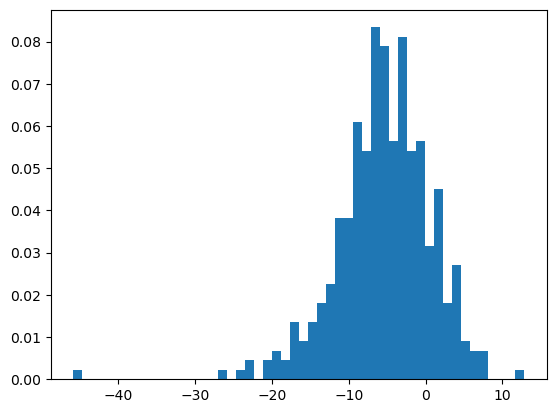

In [9]:
# events, bins, bars = plt.hist(peak_integr, 50, density=False, range=(-750, -550), label='Integral distribution')
events, bins, bars = plt.hist(peak_integr, 50, density=True, label='Integral distribution')
